In [1]:
import sys
sys.path.append(r'..\\')
from ioMicro import *

import scanpy as sc
from scipy.stats import zscore
import pandas as pd

In [55]:
def get_Xcells(cell_df,pixel_size = 0.10833*4,transpose=1,flipx=1,flipy=1):
    #xcells = cell_df['xc']*pixel_size-cell_df['xfov']
    #ycells = cell_df['yc']*pixel_size-cell_df['yfov']
    xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    ycells = cell_df['yc']*pixel_size-cell_df['xfov']
    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    return Xcells

def load_scdata(save_fld_master = r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023',set_='_set5',th_vol = 3000,th_bk = 2,good_genes = None):
    tag = os.path.basename(save_fld_master)
    save_folderf = save_fld_master+r'\final_spots'

    fl_df = save_folderf+os.sep+tag+'--'+set_+r'_df.pkl'
    fl_celldf = save_folderf+os.sep+tag+'--'+set_+r'_celldf.pkl'
    df = pd.read_pickle(fl_df)
    cell_df=pd.read_pickle(fl_celldf)
    if good_genes is None:
        lib_fls = glob.glob(r'C:\Scripts\NMERFISH\codebooks\codebook_Sonia2colorP*_group*_blank.csv')
        gns_ = list(pd.read_csv(lib_fls[3])['name'])
        gns_ = [gn for gn in gns_ if 'blank' not in gn]
        #gns_
        good_genes = [gn for gn in list(df.keys()) if ('blank' not in gn) and (gn not in gns_)]
    
    
    bad_genes = [gn for gn in list(df.keys()) if ('blank' in gn)]
    dfb = df[bad_genes]
    dff = df[good_genes]
    
    if False:
        plt.hist(np.log(cell_df['volm']),bins=200);
        
    keep = cell_df['volm']>3000
    mnb = np.mean(dfb,axis=1)
    print(np.percentile(mnb,95))
    keep = keep&(mnb<th_bk)
    print(np.mean(keep))
    dff = dff[keep]
    dfb = dfb[keep]
    cell_df = cell_df[keep]
    dff[np.isnan(dff)]=0
    scdata2 = sc.AnnData(dff)
    scdata2.obsm["X_spatial"] = get_Xcells(cell_df)
    scdata2.obsm["X_raw"] = scdata2.X.copy()
    sc.pp.calculate_qc_metrics(scdata2, percent_top=None, inplace=True)
    sc.pp.normalize_total(scdata2, target_sum=np.median(scdata2.obs["total_counts"]))

    sc.pp.log1p(scdata2)
    sc.pp.neighbors(scdata2)  #metric='correlation', use_rep = "X"
    sc.pp.pca(scdata2)
    return scdata2

In [56]:
scdata1 = sc.read_h5ad(r'D:\SoniaDataUmap\HttHuman_Snonia__06_12_2023__set5_ref.h5ad')

In [58]:
set_ = '_set4'
for set_ in ['_set1','_set3','_set4']:
    scdata2 = load_scdata(set_=set_,good_genes=scdata1.var.index)
    sc.tl.ingest(scdata2,scdata1,obs='leiden')
    sc.write(r'D:\SoniaDataUmap\HttHuman_Snonia__06_12_2023_'+set_+'.h5ad',scdata2)

1.1667021276595753
0.6694265295450584
         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


1.5767287234042553
0.6130022321428571


C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


         Falling back to preprocessing with `sc.pp.pca` and default params.
0.7659574468085106
0.5994089199355186


C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


         Falling back to preprocessing with `sc.pp.pca` and default params.


In [45]:
sc.tl.ingest(scdata2,scdata1,obs='leiden')

Text(0, 0.5, 'set5 mean counts')

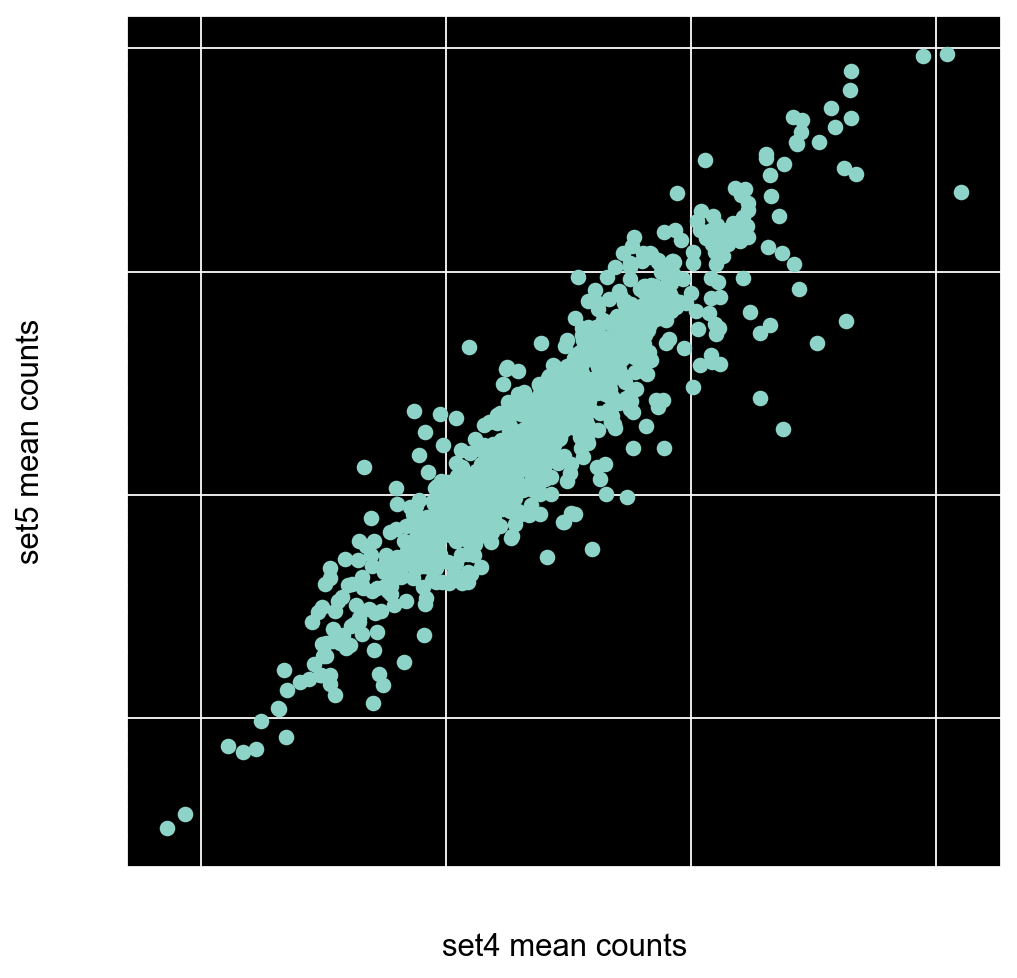

In [46]:
plt.figure(facecolor='w',figsize=(7,7))
plt.loglog(np.mean(scdata1.obsm['X_raw'],axis=0),np.mean(scdata2.obsm['X_raw'],axis=0),'o')
plt.xlabel(set_[1:]+' mean counts',c='k')
plt.ylabel('set5 mean counts',c='k')

C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


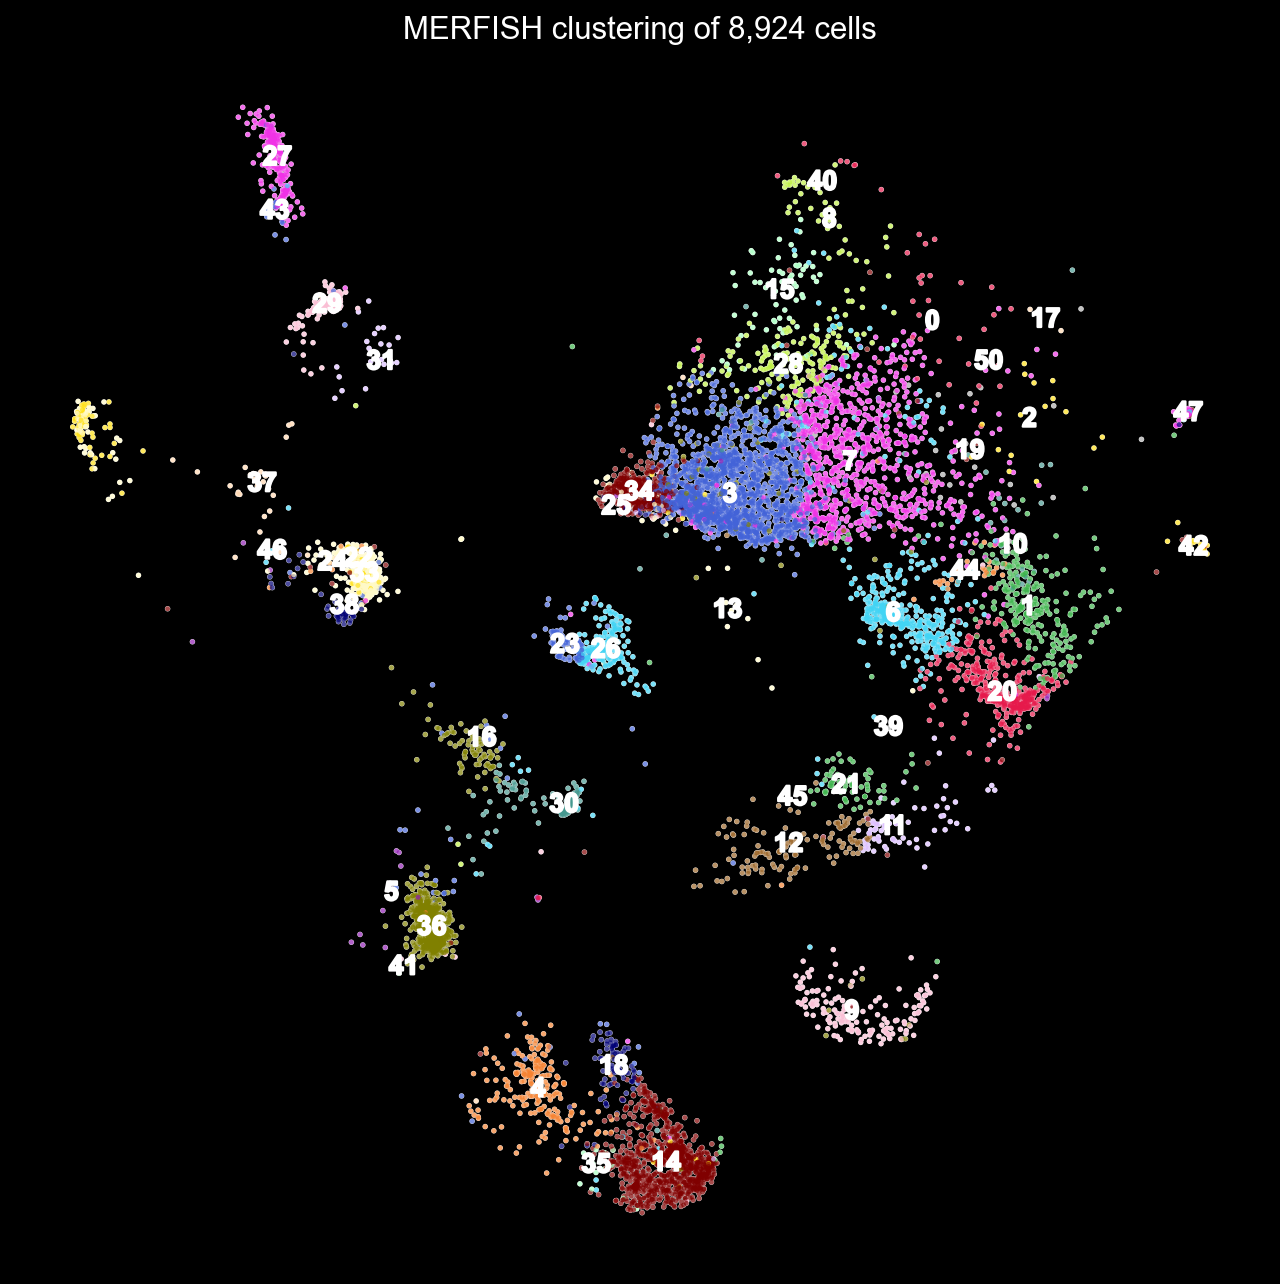

In [47]:

cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

sc.set_figure_params(figsize=(10,10))
fig = sc.pl.umap(
    scdata2,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    size=20,
    legend_fontsize=12,
    legend_fontoutline=1,
    frameon=False,
    title=f"MERFISH clustering of {len(scdata2):,d} cells",
    palette=cmap,return_fig=True
)

fig.savefig(r'D:\SoniaDataUmap'+os.sep+set_[1:]+'_umap.png')

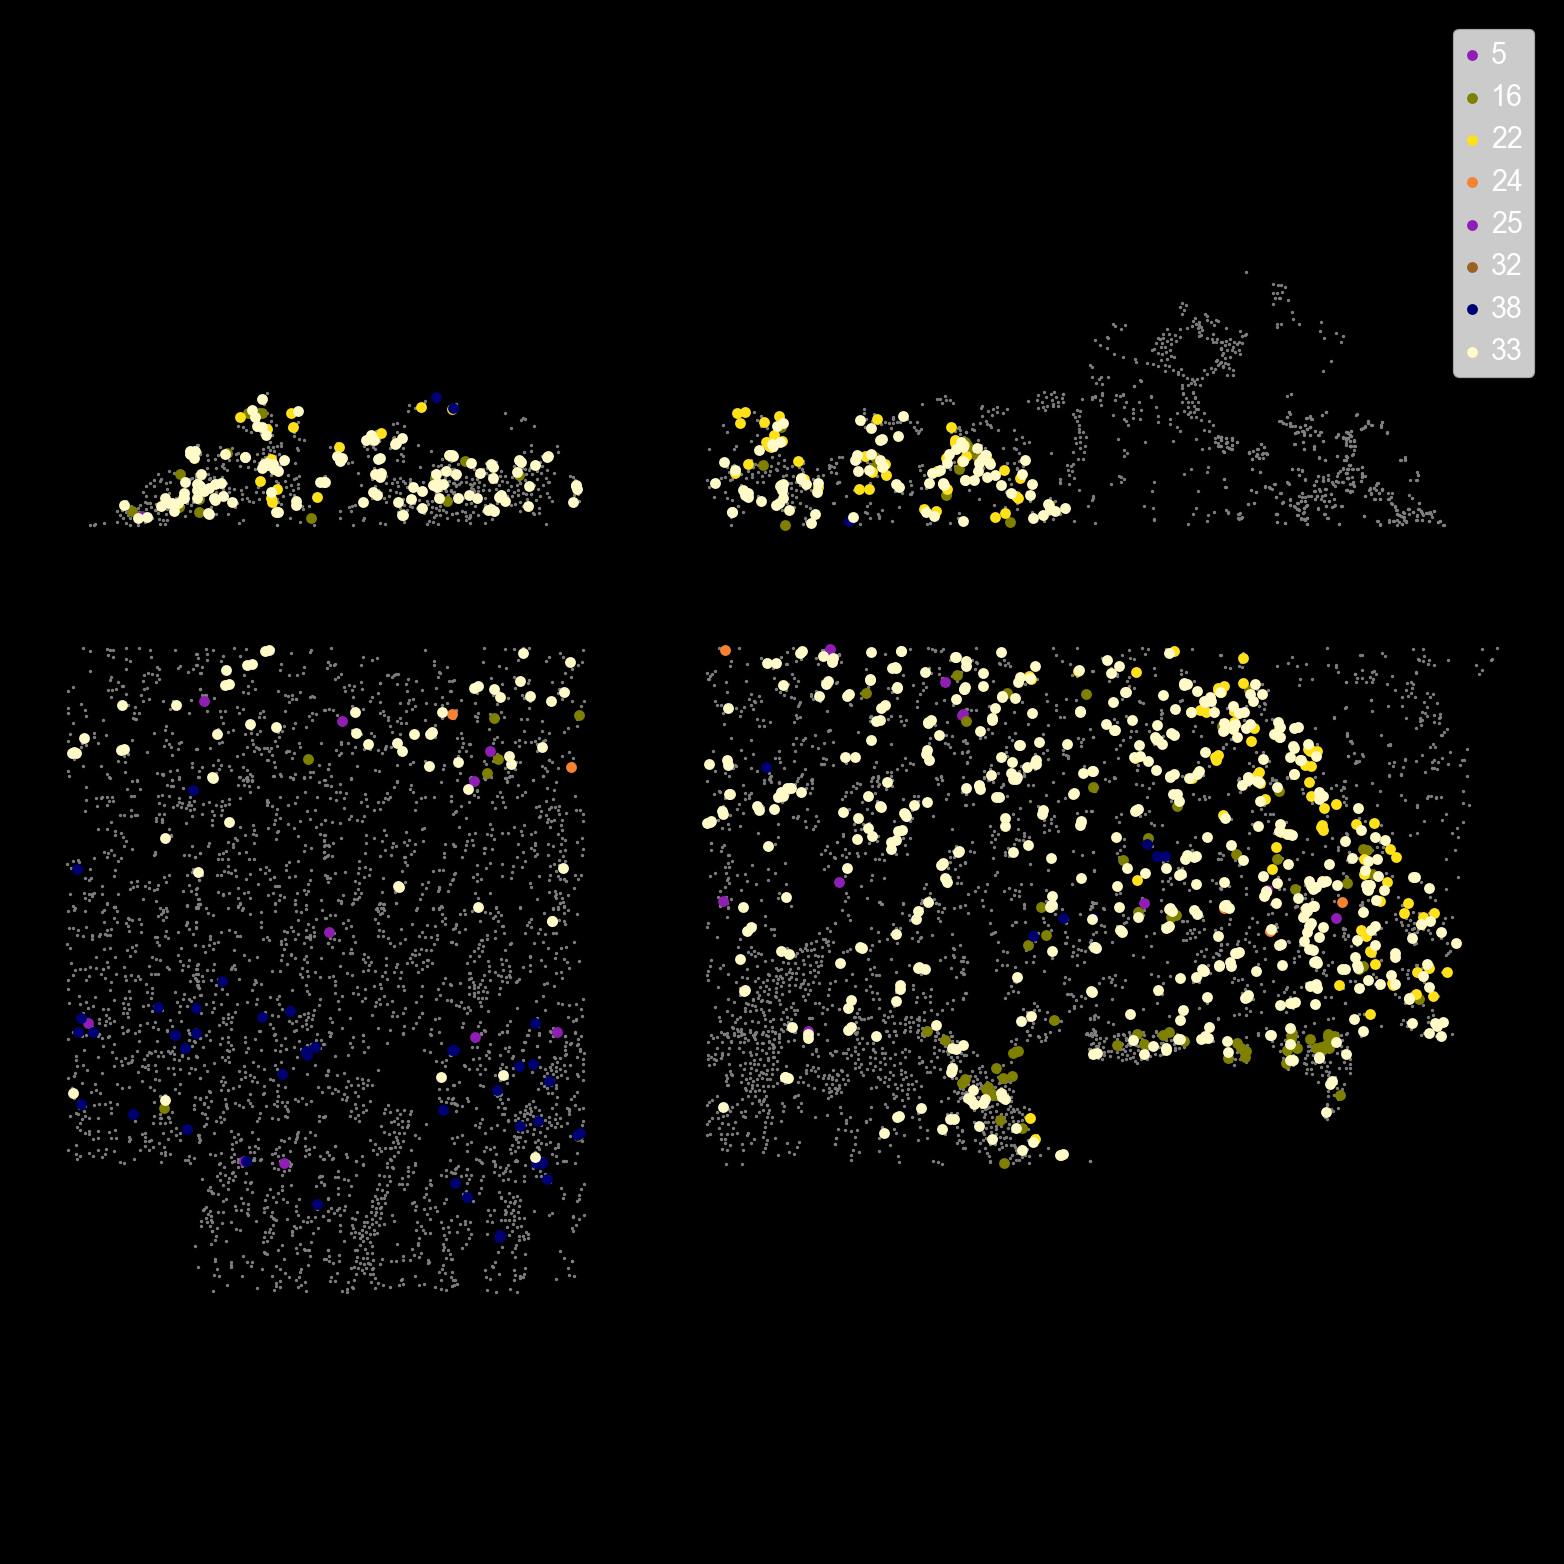

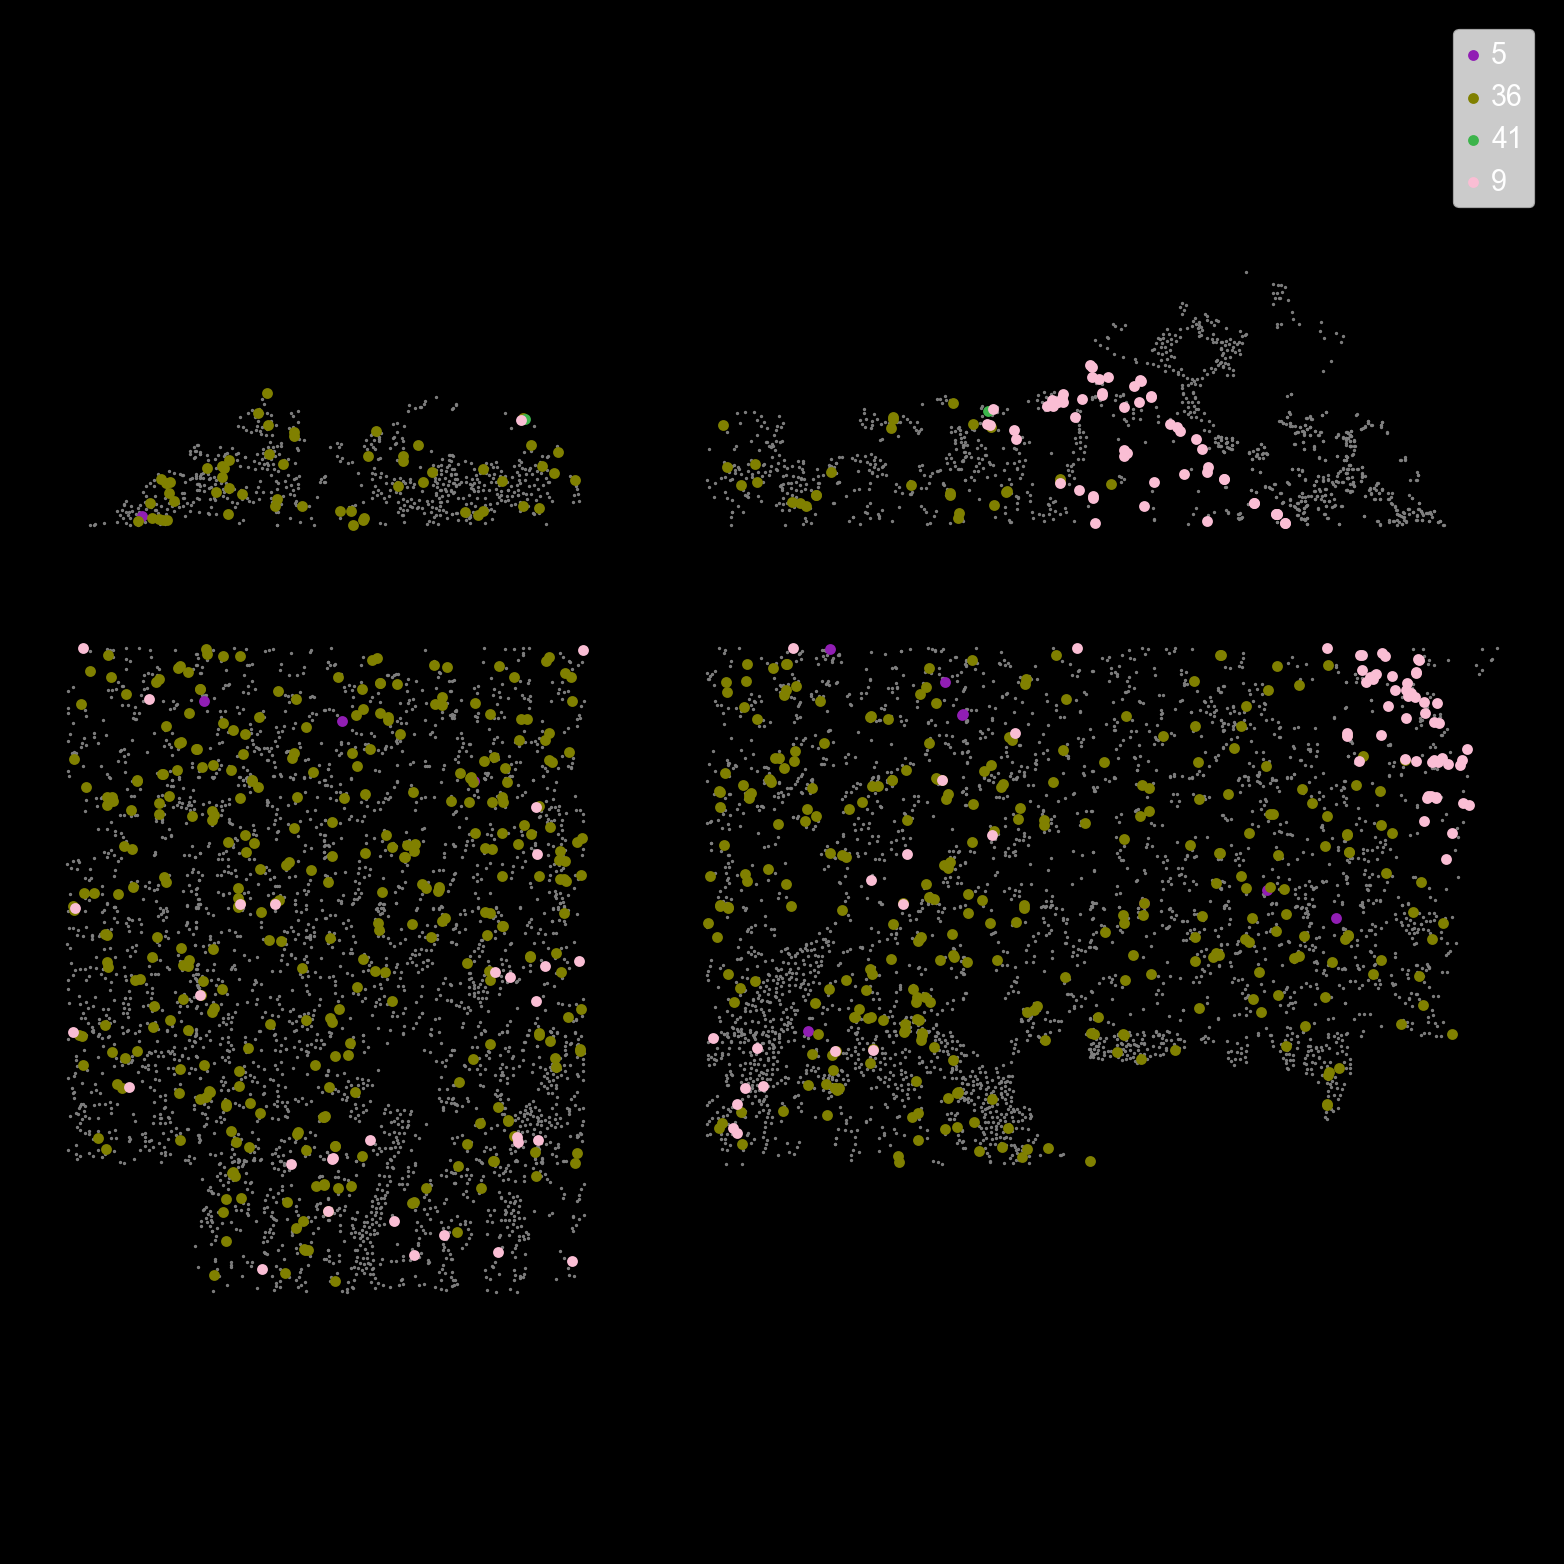

In [48]:
#set_ = '_set1'
fig = plot_cluster_scdata(scdata2,cmap,clusters=[5,16]+[22,24,25,32,38,33],small=1,sbig=60)#[22,24,25,32,38,33]
fig.savefig(r'D:\SoniaDataUmap'+os.sep+set_[1:]+'_cortical_neurons.png')

fig = plot_cluster_scdata(scdata2,cmap,clusters=[5,36,41,9],small=1,sbig=60)#[22,24,25,32,38,33]
fig.savefig(r'D:\SoniaDataUmap'+os.sep+set_[1:]+'_astrocytes.png')

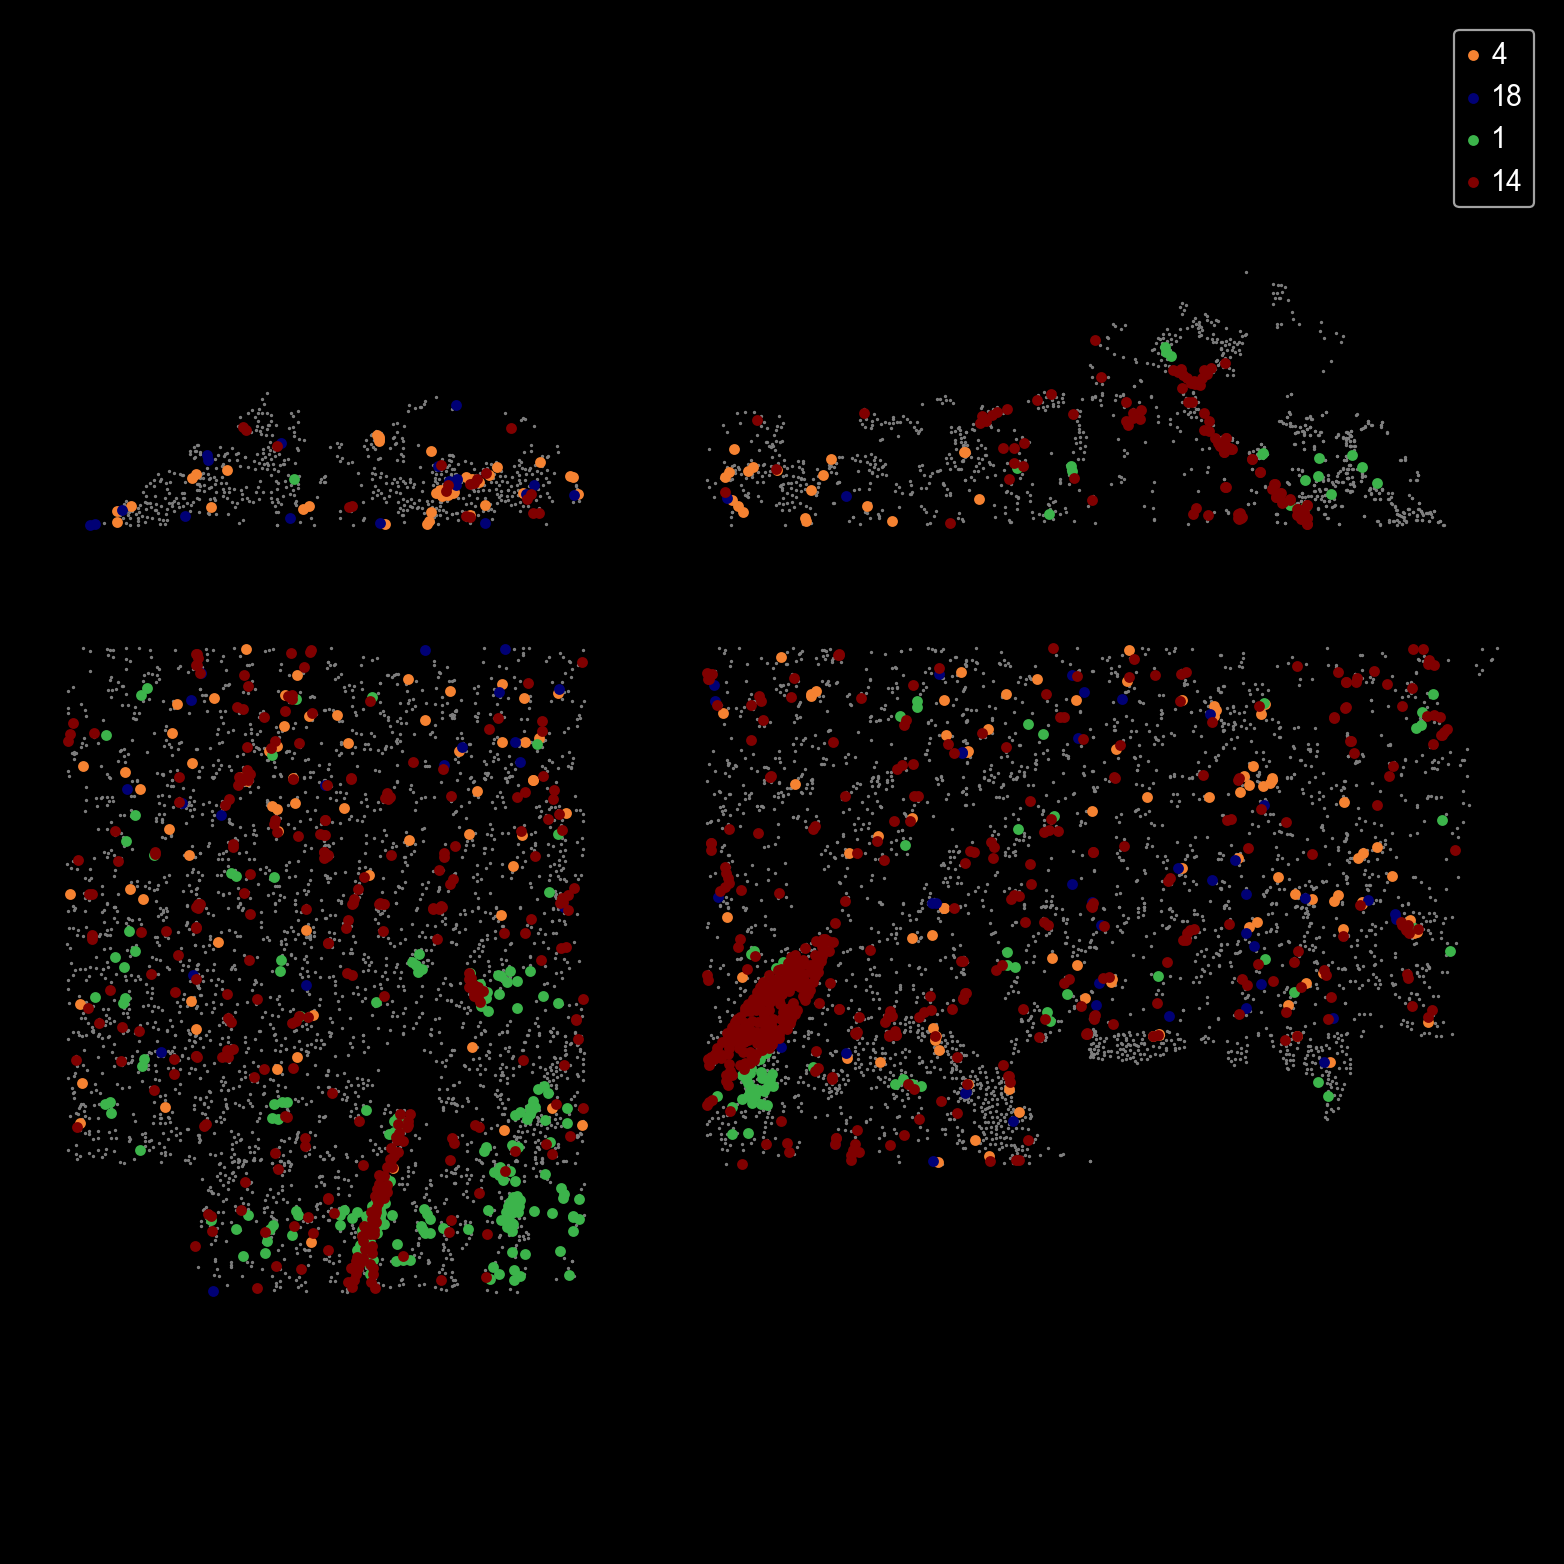

In [54]:
fig = plot_cluster_scdata(scdata2,cmap,clusters=[4,18,1,14],small=1,sbig=60)

In [52]:
#set_ = 'set3'
gene_nmaxs = [('GAD1',75),('SLC17A7',100),('AQP4',50),('LMNB1',15),('LMNA',15),('NUP98',15),('HTT',50),('OLIG1',30),('PDGFRA',30),('MOBP',30),('PLP1',125)]
for gene,nmax in gene_nmaxs:#[8]#'ADGRV1',30

    fig = plot_gene_scdata(scdata2,gene=gene,nmax=nmax,sz_min=5,sz_max=30,transpose=-1,flipx=-1,flipy=-1,tag = 'X_umap')
    fig.savefig(r'D:\SoniaDataUmap'+os.sep+'Umap'+'--'+set_[1:]+'_'+gene+'.png')
    fig = plot_gene_scdata(scdata2,gene=gene,nmax=nmax,sz_min=5,sz_max=30,transpose=1,flipx=1,flipy=1,tag = 'X_spatial')
    fig.savefig(r'D:\SoniaDataUmap'+os.sep+'Spatial'+'--'+set_[1:]+'_'+gene+'.png')
    plt.close('all')

In [51]:
set_

'_set4'

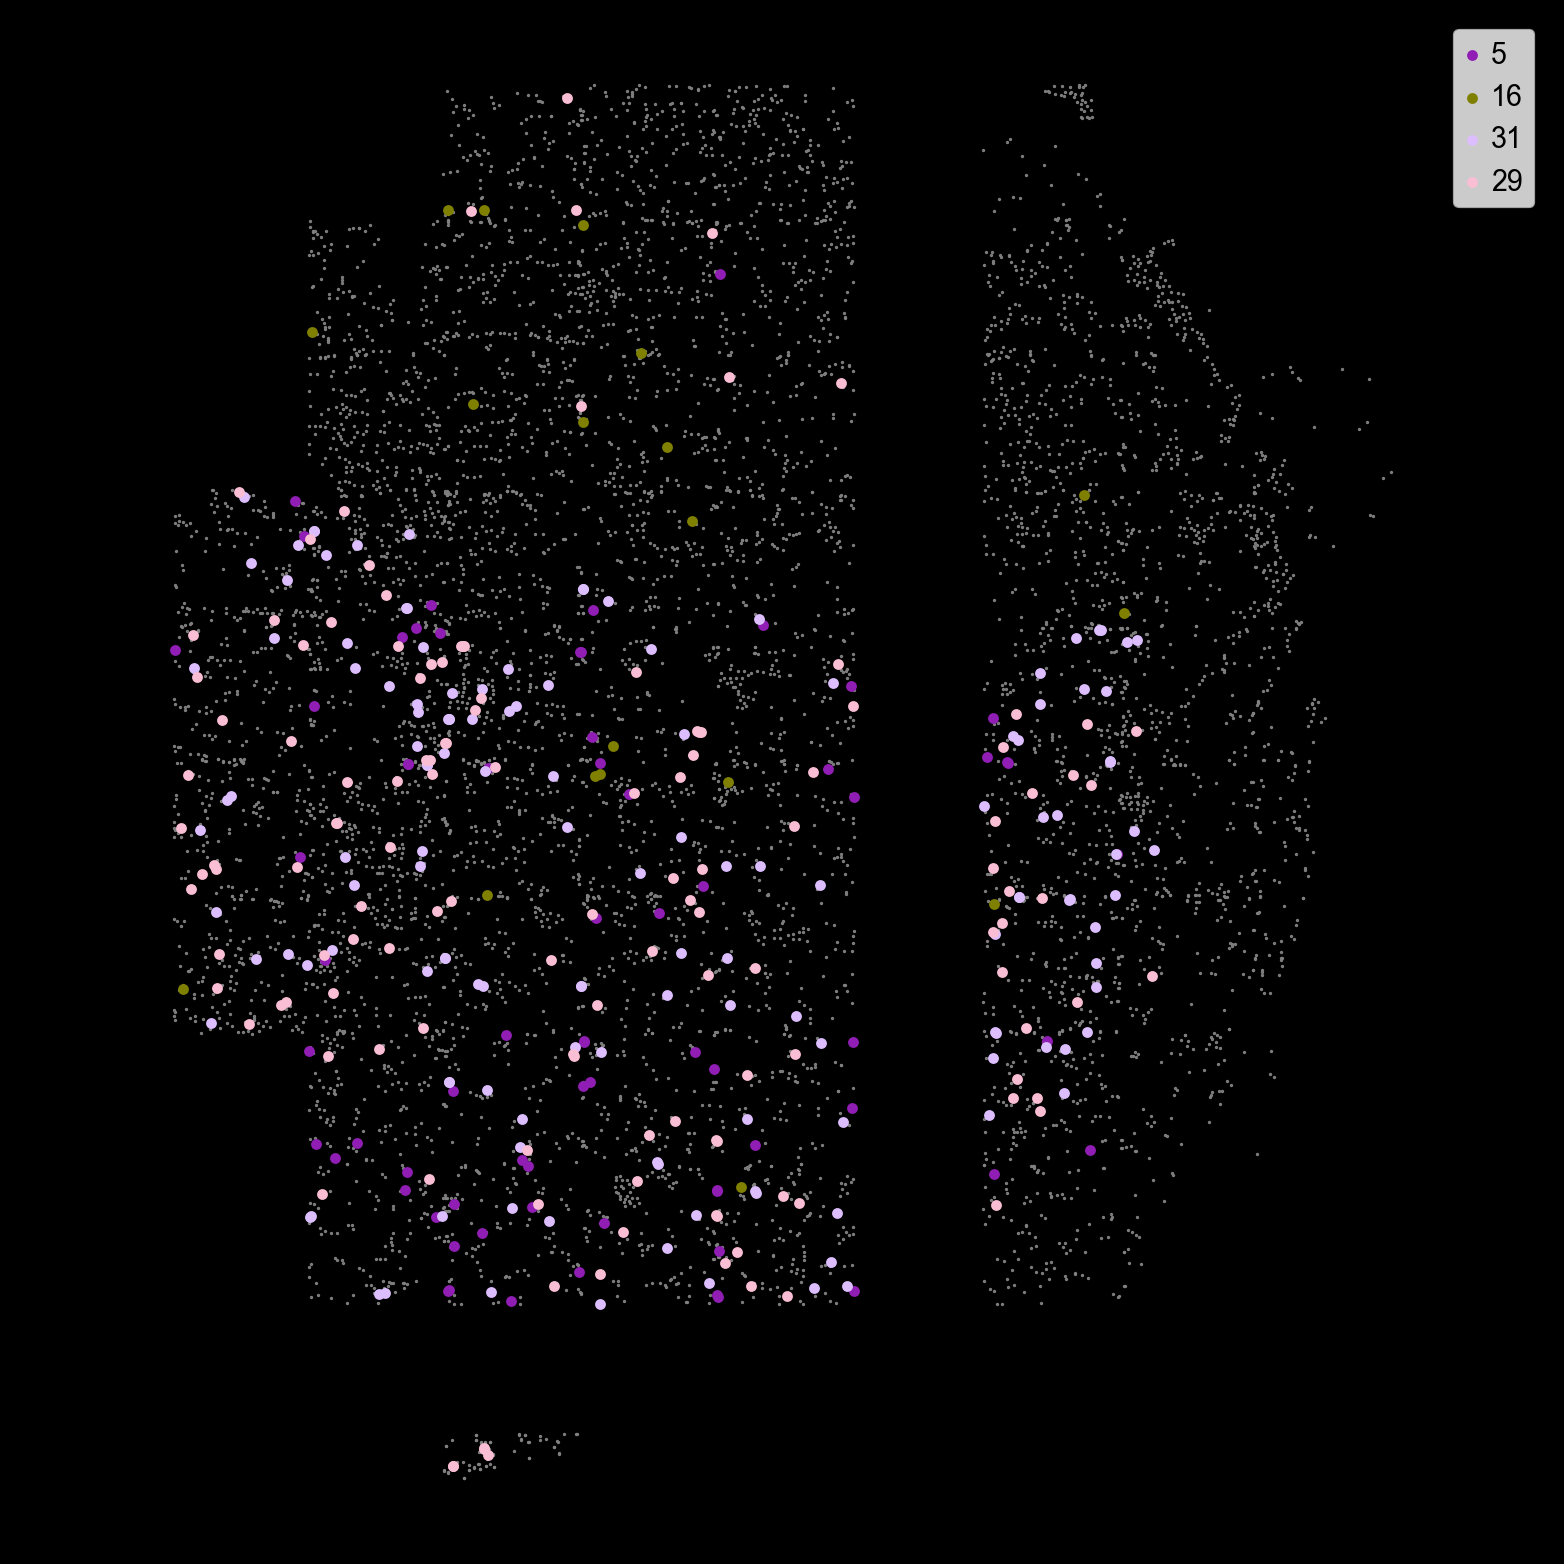

In [39]:
fig = plot_cluster_scdata(scdata2,cmap,clusters=[5,16]+[22,24,25,32,38,33,31,29],small=1,sbig=60)#[22,24,25,32,38,33]
#fig.savefig(r'D:\SoniaDataUmap'+os.sep+set_[1:]+'_cortical_neurons.png')

In [24]:
 
def plot_cluster_scdata(scdata,cmap,clusters=[1,2],transpose=1,flipx=1,flipy=1,sbig=30,small=5):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10, 10), facecolor="black")

    from matplotlib import pylab as plt
    x,y = (scdata.obsm['X_spatial']*[-flipx,-flipy])[:,::-transpose].T
    
    #np.unique(scdata.obs["leiden"].astype(np.int))[::-1]
    plt.scatter(x, y, c='gray', s=small, marker='.')
    for cluster in clusters:
        cluster_ = str(cluster)
        inds = scdata.obs["leiden"] == cluster_
        x_ = x[inds]
        y_ = y[inds]
        col = cmap[int(cluster) % len(cmap)]
        plt.scatter(x_, y_, c=col, s=sbig, marker='.',label = cluster_)
    
    plt.grid(False)
    plt.axis("off")
    plt.axis("equal")
    plt.legend()
    plt.tight_layout()
    return fig
def plot_gene_scdata(scdata2,gene='SOX9',nmax=20,sz_min=5,sz_max=30,transpose=1,flipx=1,flipy=1,tag='X_spatial'):
    Xcells = scdata2.obsm[tag][:,::transpose]*[flipx,flipy]
    ign = list(scdata2.var.index).index(gene)
    #scdata2.obsm['X_umap']
    if 'X_raw' not in scdata2.obsm:
        Xnorm = (np.exp(scdata2.X)-1)
        ncts = np.sum(Xnorm,axis=1)[0]
        scdata2.obsm['X_raw']=np.round(Xnorm/ncts*np.array(scdata2.obs['total_counts'])[:,np.newaxis])
    cts = scdata2.obsm['X_raw'][:,ign].copy()
    plt.style.use("dark_background")
    cts[np.isnan(cts)]=0
    #cts[cts>20]=0
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)

    good_cells = slice(None)
    good_cells = np.argsort(cts)

    #blanks = [gn for gn in df.columns if 'blank' in gn]
    #blanks_cts = np.nanmean(df[blanks],axis=-1)
    #good_cells = blanks_cts<th_blank

    XC = -Xcells[good_cells,::-1]
    #viewer = napari.view_points(XC,size=size[good_cells],face_color=cols[good_cells],name=gene)
    fig = plt.figure(facecolor='k')
    plt.title(gene+' - N max '+str(nmax))
    fig.set_facecolor('black')
    plt.scatter(XC[:,0],XC[:,1],c=cols[good_cells],s=size[good_cells])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    return fig